## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [116]:
# your code here
data =pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [69]:
# your code here
nl = data.isnull().sum().sum()
data.describe(exclude = 'object')
data.describe(include = 'object') 

unique_values = data.select_dtypes(include='object').describe().loc[['unique']].transpose()
binary_cat=unique_values[unique_values['unique']==2].index


data_bin=data[binary_cat]
data_bin

data_number = data.select_dtypes(exclude='object') 


ordinal_list = ['installment_rate', 'job', 'savings', 'employment_duration',  'present_residence', 'number_credits']
data_ordinal = data[ordinal_list]
data_object = data.select_dtypes(include='object')
data_object.drop(binary_cat, axis = 1, inplace = True)
data_object.drop(ordinal_list, axis = 1,  inplace = True)

data_object


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,status,credit_history,purpose,personal_status_sex,other_debtors,property,other_installment_plans,housing
0,no checking account,all credits at this bank paid back duly,car (used),female : non-single or male : single,none,car or other,none,for free
1,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,unknown / no property,none,for free
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,female : non-single or male : single,none,unknown / no property,none,for free
3,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,unknown / no property,none,for free
4,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,car or other,bank,rent
...,...,...,...,...,...,...,...,...
995,no checking account,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,unknown / no property,none,for free
996,no checking account,no credits taken/all credits paid back duly,others,male : married/widowed,co-applicant,unknown / no property,none,rent
997,... >= 200 DM / salary for at least 1 year,all credits at this bank paid back duly,others,male : married/widowed,none,real estate,none,own
998,... < 0 DM,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,real estate,none,rent


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [70]:
tmp = data.groupby(['purpose'])['amount'].mean()
tmp

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [71]:
tmp = data[(data['age']<30) & (data['housing'] == 'rent')]
tmp_30=data[data['age']<30]
pr = 100*(tmp['housing'].count()/tmp_30['housing'].count())
print('%.2f' % pr)

tmp = data[(data['age'] > 40) & (data['housing'] == 'rent')]
tmp_40 = data[data['age'] > 40]
pr = 100*(tmp['housing'].count()/tmp_40['housing'].count())
print('%.2f' % pr)


66.67
68.01


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [72]:
tmp = data[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3') ]
tmp['foreign_worker'].count()

1

### Задание 6 (1 балл)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [74]:
data


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


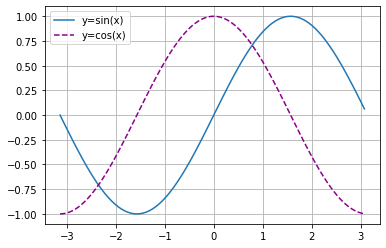

In [75]:
x = np.arange(-np.pi, np.pi,0.02*np.pi)
y1 = np.sin(x)
y2 = np.cos(x) 

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'y=sin(x)')
ax.plot(x, y2,linestyle = '--',color = 'darkmagenta', label = 'y=cos(x)')


ax.grid()
ax.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

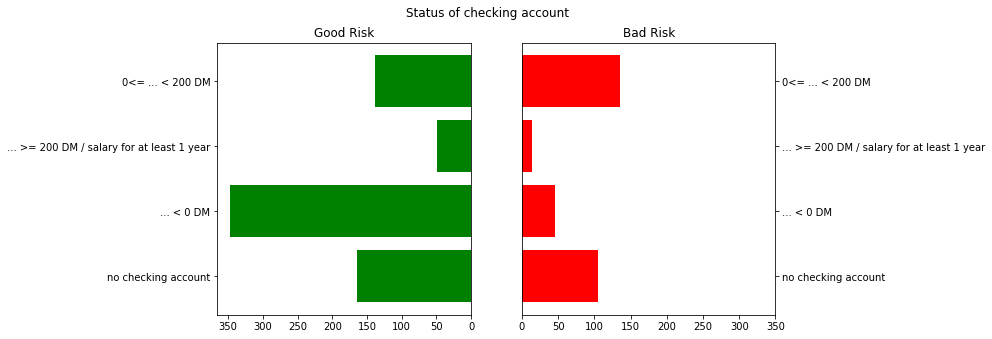

In [77]:

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5) )
fig.suptitle("Status of checking account")
uni = data.status.unique()
tmp_good = data[data['credit_risk'] == 'good']
values_good = np.array(tmp_good.groupby('status')['credit_risk'].count())

tmp_bad = data[data['credit_risk'] == 'bad']
values_bad = np.array(tmp_bad.groupby('status')['credit_risk'].count())


ax1.barh(uni, values_good, color='green')
ax1.invert_xaxis()
ax1.set_title('Good Risk')
ax2.barh(uni, values_bad, color='red')
ax2.set_title('Bad Risk')
ax2.axis(xmin=0,xmax=350)

ax2.yaxis.tick_right()


plt.show()


### Задание 8  (0.5 балла)

In [78]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [79]:
y =np.array(data[data['credit_risk'] == 'good'].groupby('status')['credit_risk'].count())
y

array([164, 348,  49, 139])

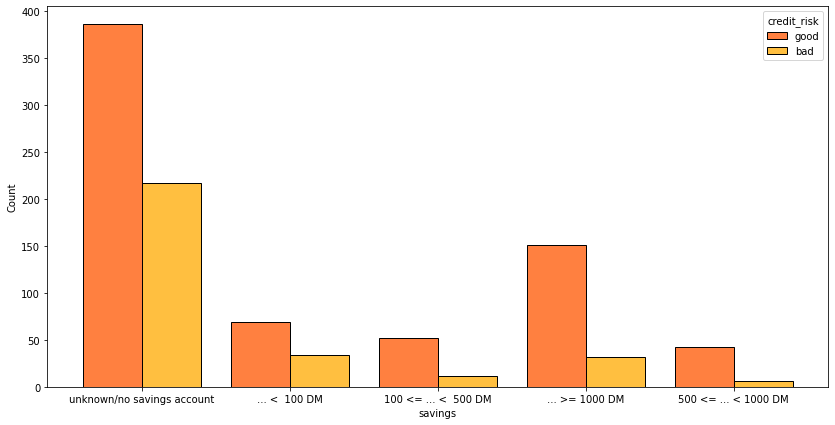

In [80]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.histplot(data=data,x = 'savings', hue = 'credit_risk',multiple="dodge", palette='autumn',shrink=.8)

#plt.title('Sex - Survived')
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

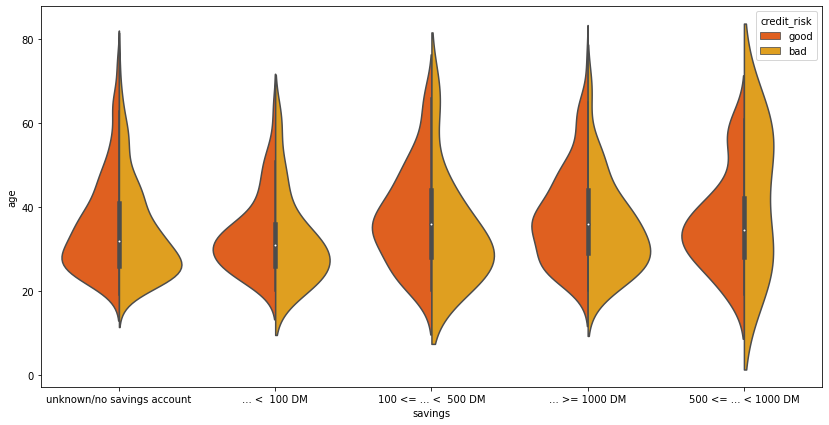

In [81]:
fig, ax = plt.subplots(figsize=(14, 7) )
ax = sns.violinplot(data=data,x = 'savings', y ='age', hue = 'credit_risk',split=True, palette='autumn', shrink=.8)

#plt.title('Sex - Survived')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.5, 0, 'Age')

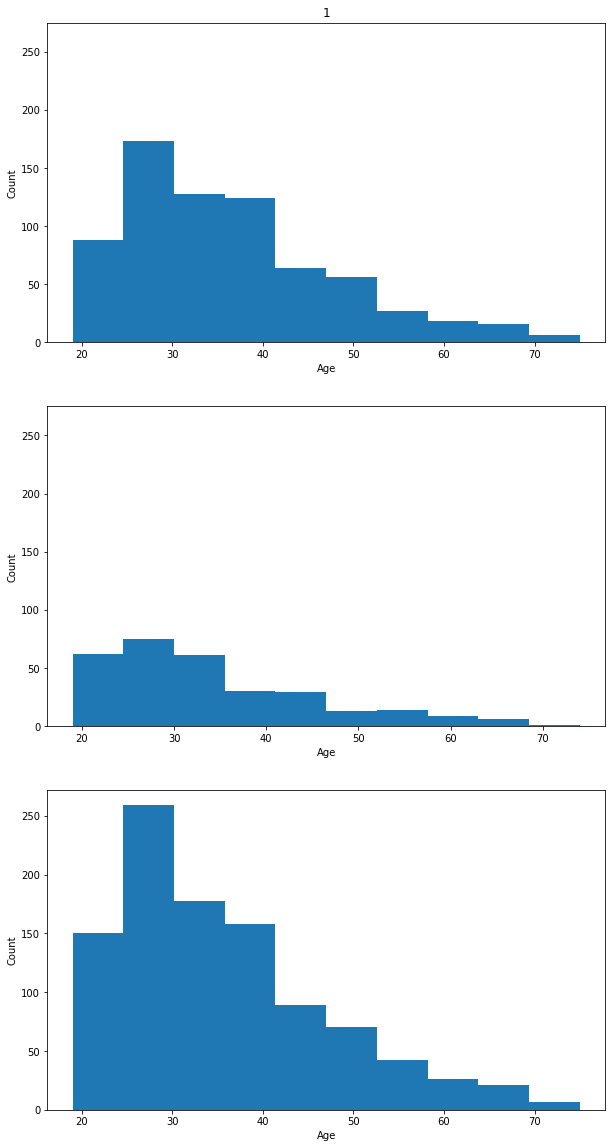

In [82]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1) # nrows, ncols, index
plt.title('1')
plt.hist(tmp_good['age'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.ylim (0, 275)


plt.subplot(3, 1, 2)
plt.hist(tmp_bad['age'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.ylim (0, 275)


plt.subplot(3, 1, 3)
plt.hist(data['age'])
plt.ylabel('Count')
plt.xlabel('Age')


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

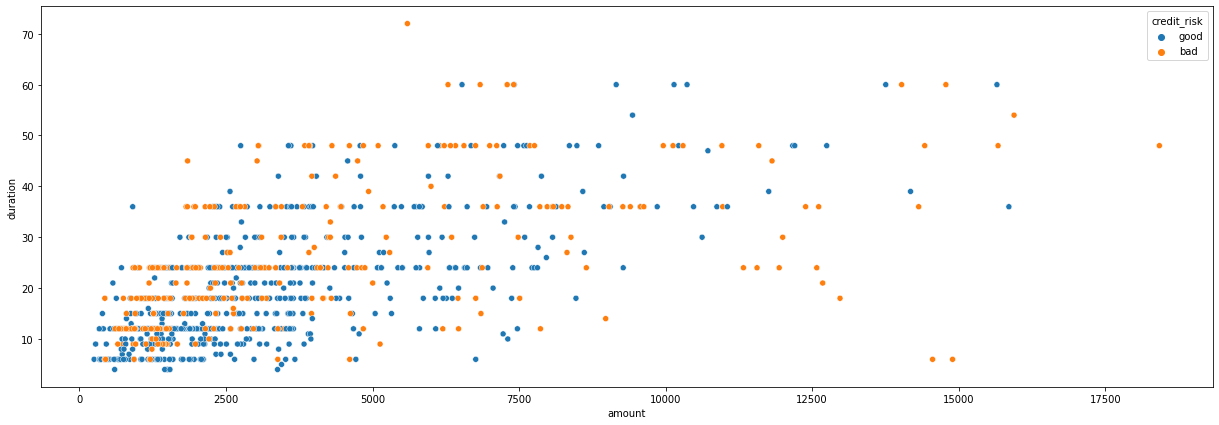

In [ ]:
plt.figure(figsize=(21,7))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

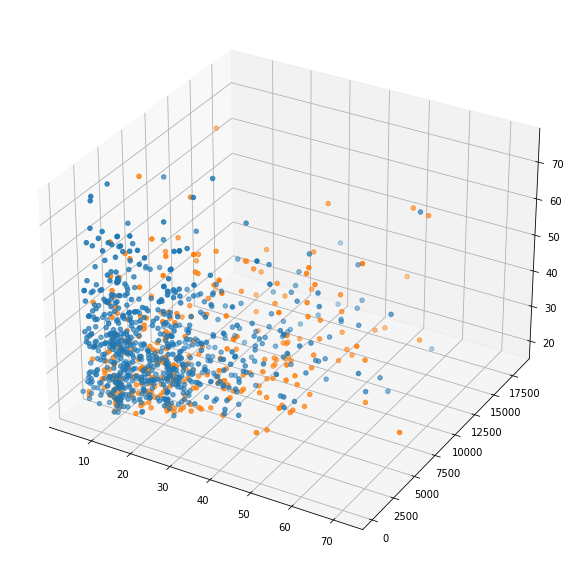

In [ ]:
fig = plt.figure(figsize=(10, 20))
ax_3d = fig.add_subplot(projection='3d')
colors = np.array(['red','green'])
ax_3d.scatter(xs = tmp_good['duration'], ys = tmp_good['amount'], zs= tmp_good['age'])
ax_3d.scatter(xs = tmp_bad['duration'], ys = tmp_bad['amount'], zs= tmp_bad['age'])

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [120]:
data = data.drop(data_object.columns, axis=1)
data


,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,0,1,0,3,21,0,2,0,0,1,0
1,9,2799,0,2,2,2,36,1,2,1,0,1,0
2,12,841,1,3,2,3,23,0,1,0,0,1,0
3,12,2122,0,2,1,2,39,1,1,1,0,0,0
4,12,2171,0,2,0,3,38,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,0,2,2,3,21,0,1,1,0,1,1
996,24,2303,0,4,0,0,45,0,2,0,0,1,1
997,21,12680,3,4,0,3,30,0,3,0,1,1,1
998,12,6468,3,0,2,0,52,0,3,0,1,1,1


In [117]:
data.credit_risk.unique()

array(['good', 'bad'], dtype=object)

In [125]:
data_ordinal
data['savings'] = data['savings']. replace (data.savings.unique(), [0,1,2,3,4])
data['job'] = data['job']. replace (data.job.unique(), [2,1,0,3])
data['employment_duration'] = data['employment_duration']. replace (data.employment_duration.unique(), [1,2,3,0,4])
data['present_residence'] = data['present_residence']. replace (data.present_residence.unique(), [3,2,1,0])
data['installment_rate'] = data['installment_rate']. replace (data.installment_rate.unique(), [0,2,1,3])
data['number_credits'] = data['number_credits']. replace (data.number_credits.unique(), [0,1,2,3])
data['people_liable'] = data['people_liable']. replace (data.people_liable.unique(), [0,1])
data['telephone'] = data['telephone']. replace (data.telephone.unique(), [0,1])
data['foreign_worker'] = data['foreign_worker']. replace (data.foreign_worker.unique(), [0,1])
data['credit_risk'] = data['credit_risk']. replace (data.credit_risk.unique(), [1,0])

data.isnull().sum().sum()


0

In [128]:
data


,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,0,1,0,3,21,0,2,0,0,0,1
1,9,2799,0,2,2,2,36,1,2,1,0,0,1
2,12,841,1,3,2,3,23,0,1,0,0,0,1
3,12,2122,0,2,1,2,39,1,1,1,0,1,1
4,12,2171,0,2,0,3,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,0,2,2,3,21,0,1,1,0,0,0
996,24,2303,0,4,0,0,45,0,2,0,0,0,0
997,21,12680,3,4,0,3,30,0,3,0,1,0,0
998,12,6468,3,0,2,0,52,0,3,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [137]:
def predict(Xtest: np.array) -> np.array:
  data = Xtest
  payment = data[:, 1]/data[:, 0] #ежемесячный платеж
  approval = 0
  approval += 0.2 * (data[:, 6] > 25)  #оценим возраст человека 
  approval += 0.05 * data[:, 11] #оценим его гражданство
  approval += 0.15 * data[:, 3] #опыт работы
  approval += 0.1 * data[:, 5]  #оценим долгосрочность работы 
  approval += 0.3*(payment>2)  #оценим сбережения так, чтобы хватало на 2 месяца оплаты кредита 
    
   
  approval = np.round(approval) #одобрен кредит(1), отказан(0)
  return approval

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

<ipython-input-137-6bef9cfaaf89>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.66